In [175]:
from tqdm import tqdm
import random
import time

In [176]:
class Tree:
    # set the left and right part of the tree, which are initially empty.
    def __init__(self, value = None):
        self.value = value
        self.left = None
        self.right = None
    
    # used to determine whether a number is in the tree.
    def __contains__(self, item):
        if self.value == item:
            return True
        elif self.left and item < self.value:
            return item in self.left
        elif self.right and item > self.value:
            return item in self.right
        else:
            return False

    # used to insert a single value into the tree.
    def add(self, value):
        # root is None, add value to the root.
        if self.value is None:
            self.value = value
        else:
            if self.value == value:
                self.value = value
            # if root value is smaller than value to be added, value is added to the right part of the tree.
            elif self.value < value:
                if self.right is None:
                    self.right = Tree(value)
                else:
                    self.right.add(value)
            # if root value is bigger than value to be added, value is added to the left part of the tree.
            else:
                if self.left is None:
                    self.left = Tree(value)
                else:
                    self.left.add(value)

    # inorder traverse BST, to test whether values are successfully added.
    def PrintTreeInOrder(self):
        elements = []
        if self.left is not None:
            elements += self.left.PrintTreeInOrder()
        elements.append(self.value)
        if self.right is not None:
            elements += self.right.PrintTreeInOrder()
        return elements

    # preorder traverse BST, to test whether values are successfully added.
    def PrintTreePreOrder(self):
        elements = [self.value]
        if self.left is not None:
            elements += self.left.PrintTreePreOrder()
        if self.right is not None:
            elements += self.right.PrintTreePreOrder()
        return elements
    # postorder traverse BST, to test whether values are successfully added.
    def PrintTreePostOrder(self):
        elements = []
        if self.left is not None:
            elements += self.left.PrintTreePostOrder()
        if self.right is not None:
            elements += self.right.PrintTreePostOrder()
        elements.append(self.value)
        return elements

In [177]:
my_tree = Tree()
for item in [55, 62, 37, 49, 71, 14, 17]:     
    my_tree.add(item)

In [178]:
# testing for add method.
# traverse the tree in order.
my_tree.PrintTreeInOrder()

[14, 17, 37, 49, 55, 62, 71]

In [179]:
# traverse the tree pre order.
my_tree.PrintTreePreOrder()

[55, 37, 14, 17, 49, 62, 71]

In [180]:
# traverse the tree post order.
my_tree.PrintTreePostOrder()

[17, 14, 49, 37, 71, 62, 55]

In [181]:
# testing for __contains__ method.
my_tree.__contains__(55)

True

In [182]:
my_tree.__contains__(42)

False

In [183]:
55 in my_tree

True

In [184]:
42 in my_tree

False

In [185]:
import random
import statistics
import matplotlib.pyplot as plt

In [186]:
# record running time of in operation.
def in_timing(n):
    times = []
    random_num = []
    random_in_num = []
    # list random_num contains n values that will be added into the tree.
    for i in range(n):
        num = random.randint(1,1000)
        random_num.append(num)
    # each tree need to determine whether 10 randomly generated numbers are in the tree.
    for i in range(10):
        num = random.randint(1,1000)
        random_in_num.append(num)
        
    count = 0
    # repeat for 100 times and choose the median value of running time.
    while(count <= 100):
        my_tree = Tree()
        for num in random_num:
            my_tree.add(num)
        start = time.perf_counter()
        for num in random_in_num:
            num in my_tree
        end = time.perf_counter()
        times.append(end - start)
        count = count + 1
    return statistics.median(times)

In [187]:
# ns is in a continuous range between 1 and 1000.
ns = range(1, 10000)
in_running_time = [in_timing(int(n)) for n in tqdm(ns)]
start_pt = in_running_time[0]
_x2 = []
_x = []
for n in tqdm(ns):
    _x2.append(start_pt * (n**2))
for n in tqdm(ns):
    _x.append(start_pt * (n))

100%|██████████| 9999/9999 [00:00<00:00, 3332447.02it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

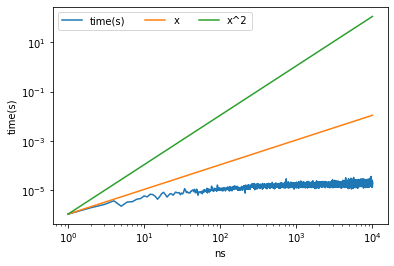

In [188]:
# use matplotlib to visualize the relationship between n and running time.
# also include curve x and x^2.
ns = list(ns)
plt.plot(ns, in_running_time)
plt.plot(ns, _x)
plt.plot(ns, _x2)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("ns")
plt.ylabel("time(s)")
plt.legend(["time(s)","x","x^2"], ncol = 3)
plt.show

In [189]:
# record running time of tree set up.
def setup_tree_timing(n):
    times = []
    random_num = []
    for i in range(n):
        num = random.randint(1,1000)
        random_num.append(num)

    count = 0
    while(count <= 100):
        start = time.perf_counter()
        my_tree = Tree(random_num[0])
        for num in random_num[1:]:
            my_tree.add(num)
        end = time.perf_counter()
        times.append(end - start)
        count = count + 1
    return statistics.median(times)

In [190]:
# ns is in a continuous range between 1 and 1000.
ns = range(1, 10000)
setup_running_time = [setup_tree_timing(int(n)) for n in tqdm(ns)]
start_pt = setup_running_time[0]
_x2 = []
_x = []
for n in tqdm(ns):
    _x2.append(start_pt * (n**2))
for n in tqdm(ns):
    _x.append(start_pt * (n))


100%|██████████| 9999/9999 [00:00<00:00, 4999862.39it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

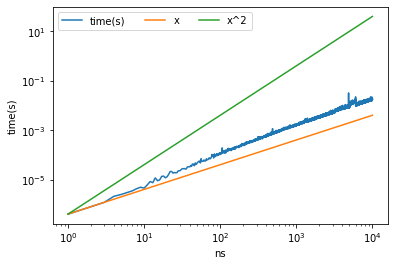

In [191]:
# use matplotlib to visualize the relationship between n and running time.
# also include curve x and x^2.
ns = list(ns)
plt.plot(ns, setup_running_time)
plt.plot(ns, _x)
plt.plot(ns, _x2)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("ns")
plt.ylabel("time(s)")
plt.legend(["time(s)","x","x^2"], ncol = 3)
plt.show